ライブラリの呼び出し

In [1]:
import sys
import os

# 現在の作業ディレクトリを基にプロジェクトのルートディレクトリを設定
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)
print(project_root)

c:\Users\小山佳祐\Desktop\研究元ファイル\abnormal\research_abnormal - コピー


In [2]:
#必要ライブラリのインストール
from src import data
from src import model_basic
from src import store
from src import plot
from src.model import model_check_features_1
import config

In [108]:
#モジュールの再リロード
import importlib
import src
import src.data
import src.model_basic
import src.store

importlib.reload(src.data)
importlib.reload(src.model_basic)
importlib.reload(src.store)
importlib.reload(src.plot)
importlib.reload(src.model.model_check_features_1)



<module 'src.model.model_check_features_1' from 'c:\\Users\\小山佳祐\\Desktop\\研究元ファイル\\abnormal\\research_abnormal - コピー\\src\\model\\model_check_features_1.py'>

データの読み込み

In [109]:
#データの読み込み及び加工、コラムリストの取得
data_ex, data_original = data.data_complete()

キャッシュファイルからデータを読み込みます


In [110]:
# 各列のデータ型を確認
for col in data_ex.columns:
        if data_ex[col].dtype == "float64":  # データ型が float64 の列を確認
            data_ex[col] = data_ex[col].astype("float32")  # float32 に変換

# 各列のデータ型を確認
print(data_ex.dtypes)
data_ex

processor_unit_units_status_cpu_board_cpu_fan                 float32
processor_unit_units_status_cpu_board_cpu_bd_fan1             float32
processor_unit_units_status_cpu_board_cpu_bd_fan2             float32
processor_unit_units_status_cpu_board_cpu_bd_temp             float32
processor_unit_units_status_cpu_board_cpu_core_temp           float32
processor_unit_units_status_cpu_board_gpu_core_temp           float32
processor_unit_units_status_cpu_board_cpu_core_vol            float32
processor_unit_units_status_cpu_board_cpu_bd_vbat             float32
processor_unit_units_status_cpu_board_cpu_bd_p3_3v            float32
processor_unit_units_status_cpu_board_cpu_bd_p5v              float32
processor_unit_units_status_cpu_board_cpu_bd_p12v             float32
measurement_date                                       datetime64[ns]
dtype: object


processor_unit_units_status_cpu_board_cpu_fan  \
0                                           0.735761   
1                                           0.766849   
2                                           0.797937   
3                                           0.834207   
4                                           0.735761   
...                                              ...   
26420                                       0.378248   
26421                                       0.378248   
26422                                       0.378248   
26423                                       0.378248   
26424                                       0.347160   

       processor_unit_units_status_cpu_board_cpu_bd_fan1  \
0                                               0.562054   
1                                               0.649645   
2                                               0.562054   
3                                               0.562054   
4                                               0.474463   
...                                                  ...   
26420                                           0.364974   
26421                                           0.364974   
26422                                           0.277382   
26423                                           0.364974   
26424                                           0.306579   

       processor_unit_units_status_cpu_board_cpu_bd_fan2  \
0                                               0.902923   
1                                               0.913514   
2                                               0.928518   
3                                               0.924988   
4                                               0.924988   
...                                                  ...   
26420                                           0.688448   
26421                                           0.792596   
26422                                           0.765235   
26423                                           0.724635   
26424                                           0.480151   

       processor_unit_units_status_cpu_board_cpu_bd_temp  \
0                                               0.740751   
1                                               0.777788   
2                                               0.814825   
3                                               0.814825   
4                                               0.777788   
...                                                  ...   
26420                                           0.444454   
26421                                           0.444454   
26422                                           0.444454   
26423                                           0.444454   
26424                                           0.444454   

       processor_unit_units_status_cpu_board_cpu_core_temp  \
0                                               0.638899     
1                                               0.666677     
2                                               0.694454     
3                                               0.694454     
4                                               0.666677     
...                                                  ...     
26420                                           0.361121     
26421                                           0.361121     
26422                                           0.333343     
26423                                           0.333343     
26424                                           0.305566     

       processor_unit_units_status_cpu_board_gpu_core_temp  \
0                                               0.633343     
1                                               0.666677     
2                                               0.700010     
3                                               0.700010     
4                                               0.633343     
...                                                  .

ハイパーパラメータの設定

In [ ]:
#ハイパーパラメータの設定

#オートエンコーダの重みの初期化方法
initializer = "glorot_normal"

#最大エポック数
max_epochs = 100000

#ノード数
units = 11

#モデル決定の閾値（再構成誤差のパラメータ）
#この閾値を下回ることで十分な性能を持つモデルとする
#今回は使用しない
error_threshold = 0.0018

# シード値の準備
seeds = [1,2,3,4]

# ユニット数の準備
# 各３期間についてユニット数が異なるので辞書型配列と配列で対応
units_1 = {"unit_1_3" : 30, "unit_2":10}
units_2 = {"unit_1_3" : 30, "unit_2":10}
units_3 = {"unit_1_3" : 30, "unit_2":10}
unit_paras = [units_1 , units_2, units_3]

# 学習バッチサイズ
batch_size=64

# 監視するエポック数
patience = 1000

# 学習変化の閾値
min_delta = 10e-10

# 何期間連続して予測を行うか
num = 3

#　初期化回数
num_retry = 4

#　詳細な出力
detail_log = True

#学習率
learning_rate = 1e-4

params = {"initializer":initializer, "max_epochs":max_epochs, "units":units,
	"error_threshold":error_threshold, "seeds":seeds, "unit_paras": unit_paras, 
	"batch_size":batch_size, "patience":patience, "min_delta": min_delta, "num":num,
    "num_retry": num_retry, "detail_log":detail_log, "learning_rate":learning_rate}

In [116]:
#実験の実行及び結果の格納
abnormal_scores, thresholds, learning_epochs_per_features_array, reconstraction_train_per_features, reconstraction_test_per_features, thresholds_per_features = model_check_features_1.result(data_ex , params)

1回目の期間のモデル
該当期間の確認
はじまり(train)2016/6/01 00:00:00
終わり(train)2018/6/01 00:00:00
はじまり(test)2018/6/01 00:00:00
終わり(test)2018/7/01 00:00:00
1回目の期間のモデル作成開始
1回目の期間のトレーニングデータ数:17161
モデルの作成
初期化方法：glorot_normal、units_1_3:30、units_2:10
初期化：1回目
シード値：1


c:\Users\小山佳祐\Desktop\研究元ファイル\abnormal\research_abnormal - コピー\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


バッチ数：268
1/2での再構成誤差：0.2943410873413086,変化量：inf
-----------------------------------------------------------------------------------
バッチ数：268
2/2での再構成誤差：0.29325899481773376,変化量：0.001082092523574829
-----------------------------------------------------------------------------------
1000回条件を満たさなかったので1000回学習を行いました
1回目の期間のモデル作成終了
537/537 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
5892
(17161, 11)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1期間での結果の概要
閾値：0.6078164577484131
トレーニングデータに対する特徴量ごとの再構成誤差の平均
processor_unit_units_status_cpu_board_cpu_fan          0.121981
processor_unit_units_status_cpu_board_cpu_bd_fan1      0.131454
processor_unit_units_status_cpu_board_cpu_bd_fan2      0.064900
processor_unit_units_status_cpu_board_cpu_bd_temp      0.123368
processor_unit_units_status_cpu_board_cpu_core_temp    0.100323
processor_

c:\Users\小山佳祐\Desktop\研究元ファイル\abnormal\research_abnormal - コピー\src\model\model_check_features_1.py:194: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  abnormal_scores = pd.concat([abnormal_scores,abnormal_score_df])
c:\Users\小山佳祐\Desktop\研究元ファイル\abnormal\research_abnormal - コピー\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


バッチ数：267
1/2での再構成誤差：0.28405696153640747,変化量：inf
-----------------------------------------------------------------------------------
バッチ数：267
2/2での再構成誤差：0.2836753726005554,変化量：0.0003815889358520508
-----------------------------------------------------------------------------------
1000回条件を満たさなかったので1000回学習を行いました
2回目の期間のモデル作成終了
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
5222
(17141, 11)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2期間での結果の概要
閾値：0.6133447885513306
トレーニングデータに対する特徴量ごとの再構成誤差の平均
processor_unit_units_status_cpu_board_cpu_fan          0.126524
processor_unit_units_status_cpu_board_cpu_bd_fan1      0.132938
processor_unit_units_status_cpu_board_cpu_bd_fan2      0.088859
processor_unit_units_status_cpu_board_cpu_bd_temp      0.127559
processor_unit_units_status_cpu_board_cpu_core_temp    0.099348
processor

c:\Users\小山佳祐\Desktop\研究元ファイル\abnormal\research_abnormal - コピー\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


バッチ数：267
1/2での再構成誤差：0.2674392759799957,変化量：inf
-----------------------------------------------------------------------------------
バッチ数：267
2/2での再構成誤差：0.2665554881095886,変化量：0.0008837878704071045
-----------------------------------------------------------------------------------
1000回条件を満たさなかったので1000回学習を行いました
3回目の期間のモデル作成終了
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
4517
(17129, 11)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
3期間での結果の概要
閾値：0.5881503224372864
トレーニングデータに対する特徴量ごとの再構成誤差の平均
processor_unit_units_status_cpu_board_cpu_fan          0.127668
processor_unit_units_status_cpu_board_cpu_bd_fan1      0.130887
processor_unit_units_status_cpu_board_cpu_bd_fan2      0.123655
processor_unit_units_status_cpu_board_cpu_bd_temp      0.117793
processor_unit_units_status_cpu_board_cpu_core_temp    0.093056
processor

In [93]:
print(abnormal_scores)

         measurement_date  anomaly_score
20937 2018-06-01 00:00:03       0.203623
20938 2018-06-01 01:00:02       0.027707
20939 2018-06-01 02:00:02       0.070131
20940 2018-06-01 03:00:02       0.088148
20941 2018-06-01 04:00:02       0.081130
...                   ...            ...
22969 2018-08-31 19:00:03       0.084051
22970 2018-08-31 20:00:04       0.138420
22971 2018-08-31 21:00:04       0.221085
22972 2018-08-31 22:00:03       0.146637
22973 2018-08-31 23:00:03       0.175212

[2037 rows x 2 columns]


In [94]:
print(thresholds)

{'period1': {'test_start': '2018/6/01 00:00:00', 'test_end': '2018/7/01 00:00:00', 'threshold_data': 0.60145783}, 'period2': {'test_start': '2018/7/01 00:00:00', 'test_end': '2018/8/01 00:00:00', 'threshold_data': 0.60885835}, 'period3': {'test_start': '2018/8/01 00:00:00', 'test_end': '2018/9/01 00:00:00', 'threshold_data': 0.587007}}


In [95]:
print(learning_epochs_per_features_array)

        processor_unit_units_status_cpu_board_cpu_fan  \
period1                                             2   
period2                                             2   
period3                                             2   

        processor_unit_units_status_cpu_board_cpu_bd_fan1  \
period1                                                 2   
period2                                                 2   
period3                                                 2   

        processor_unit_units_status_cpu_board_cpu_bd_fan2  \
period1                                                 2   
period2                                                 2   
period3                                                 2   

        processor_unit_units_status_cpu_board_cpu_bd_temp  \
period1                                                 2   
period2                                                 2   
period3                                                 2   

        processor_unit_units_status_

In [96]:
print(reconstraction_train_per_features)

        processor_unit_units_status_cpu_board_cpu_fan  \
period1                                      0.121949   
period2                                      0.125532   
period3                                      0.127157   

        processor_unit_units_status_cpu_board_cpu_bd_fan1  \
period1                                          0.132106   
period2                                          0.132185   
period3                                          0.130454   

        processor_unit_units_status_cpu_board_cpu_bd_fan2  \
period1                                          0.070692   
period2                                          0.090054   
period3                                          0.123117   

        processor_unit_units_status_cpu_board_cpu_bd_temp  \
period1                                          0.121536   
period2                                          0.126378   
period3                                          0.118734   

        processor_unit_units_status_

In [97]:
print(reconstraction_test_per_features)

        processor_unit_units_status_cpu_board_cpu_fan  \
period1                                      0.157119   
period2                                      0.102524   
period3                                      0.080377   

        processor_unit_units_status_cpu_board_cpu_bd_fan1  \
period1                                          0.145259   
period2                                          0.091531   
period3                                          0.072991   

        processor_unit_units_status_cpu_board_cpu_bd_fan2  \
period1                                          0.044223   
period2                                           0.03139   
period3                                          0.090972   

        processor_unit_units_status_cpu_board_cpu_bd_temp  \
period1                                          0.132508   
period2                                          0.088502   
period3                                          0.079585   

        processor_unit_units_status_

In [98]:
print(thresholds_per_features)

        processor_unit_units_status_cpu_board_cpu_fan  \
period1                                      0.512465   
period2                                      0.542718   
period3                                      0.469514   

        processor_unit_units_status_cpu_board_cpu_bd_fan1  \
period1                                          0.403977   
period2                                          0.435562   
period3                                          0.382396   

        processor_unit_units_status_cpu_board_cpu_bd_fan2  \
period1                                          0.013489   
period2                                          0.010952   
period3                                          0.051764   

        processor_unit_units_status_cpu_board_cpu_bd_temp  \
period1                                          0.564666   
period2                                          0.588712   
period3                                          0.535387   

        processor_unit_units_status_

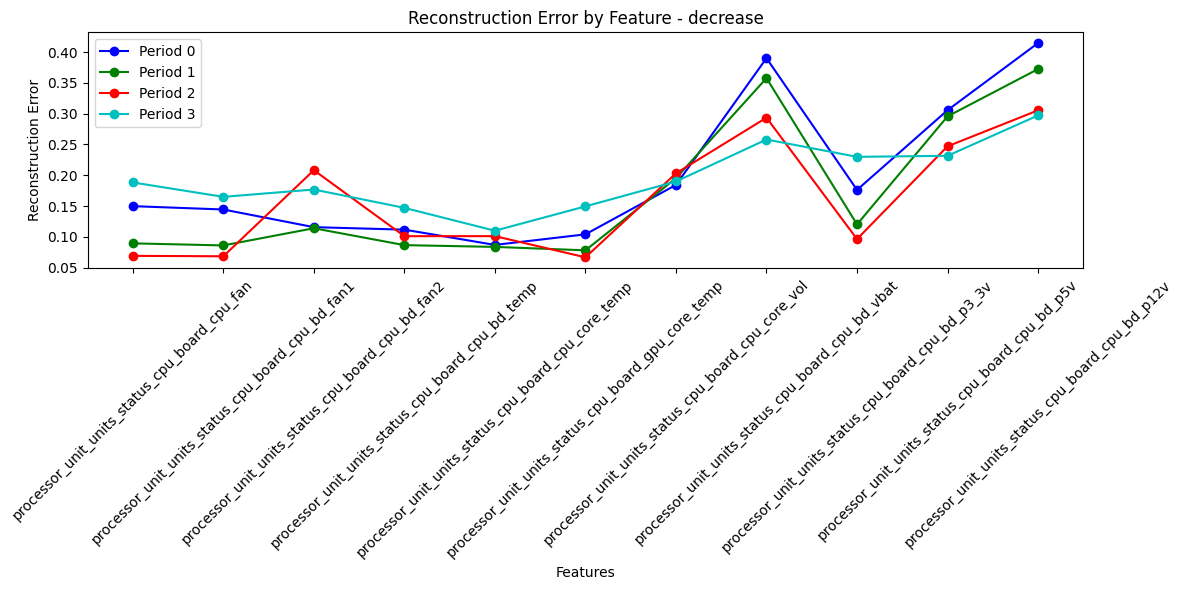

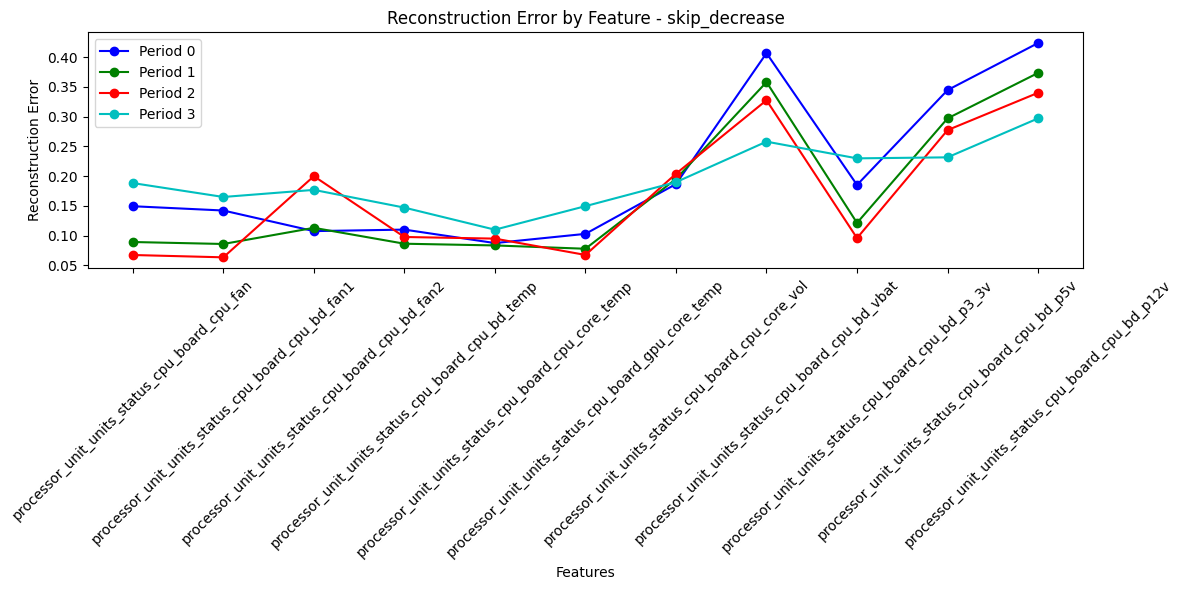

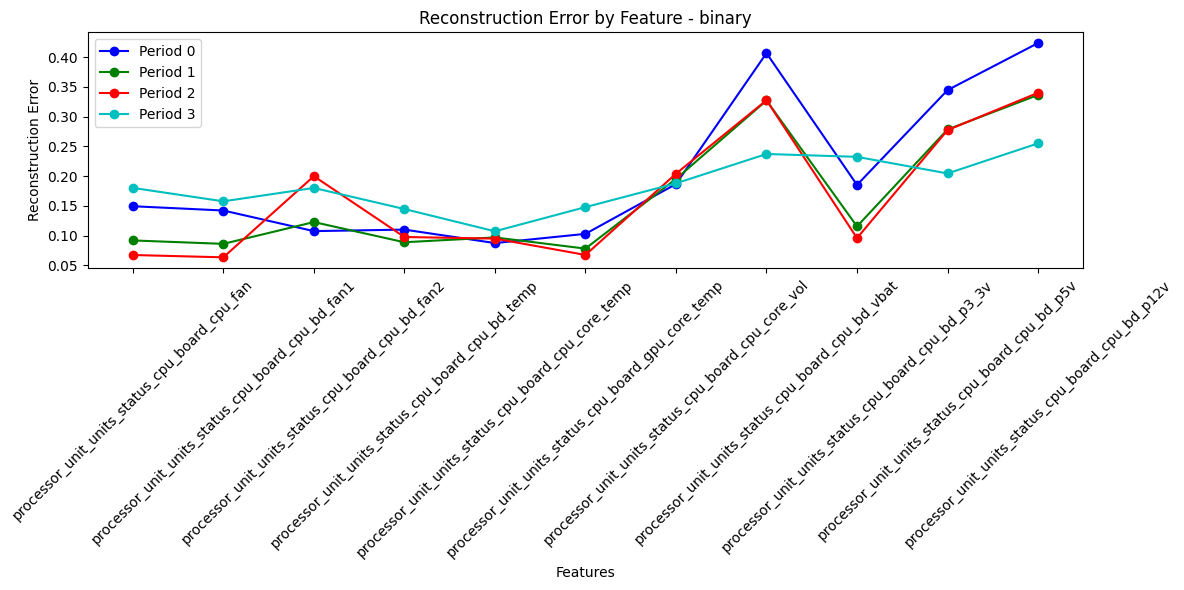

In [56]:
plot.plot_error_train(errors_train)

In [90]:
#結果の抜き出し
#結果のデータを保存しているのではなくモデルを保存している

c:\Users\小山佳祐\Desktop\研究元ファイル\abnormal\research_abnormal - コピー\src\plot.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


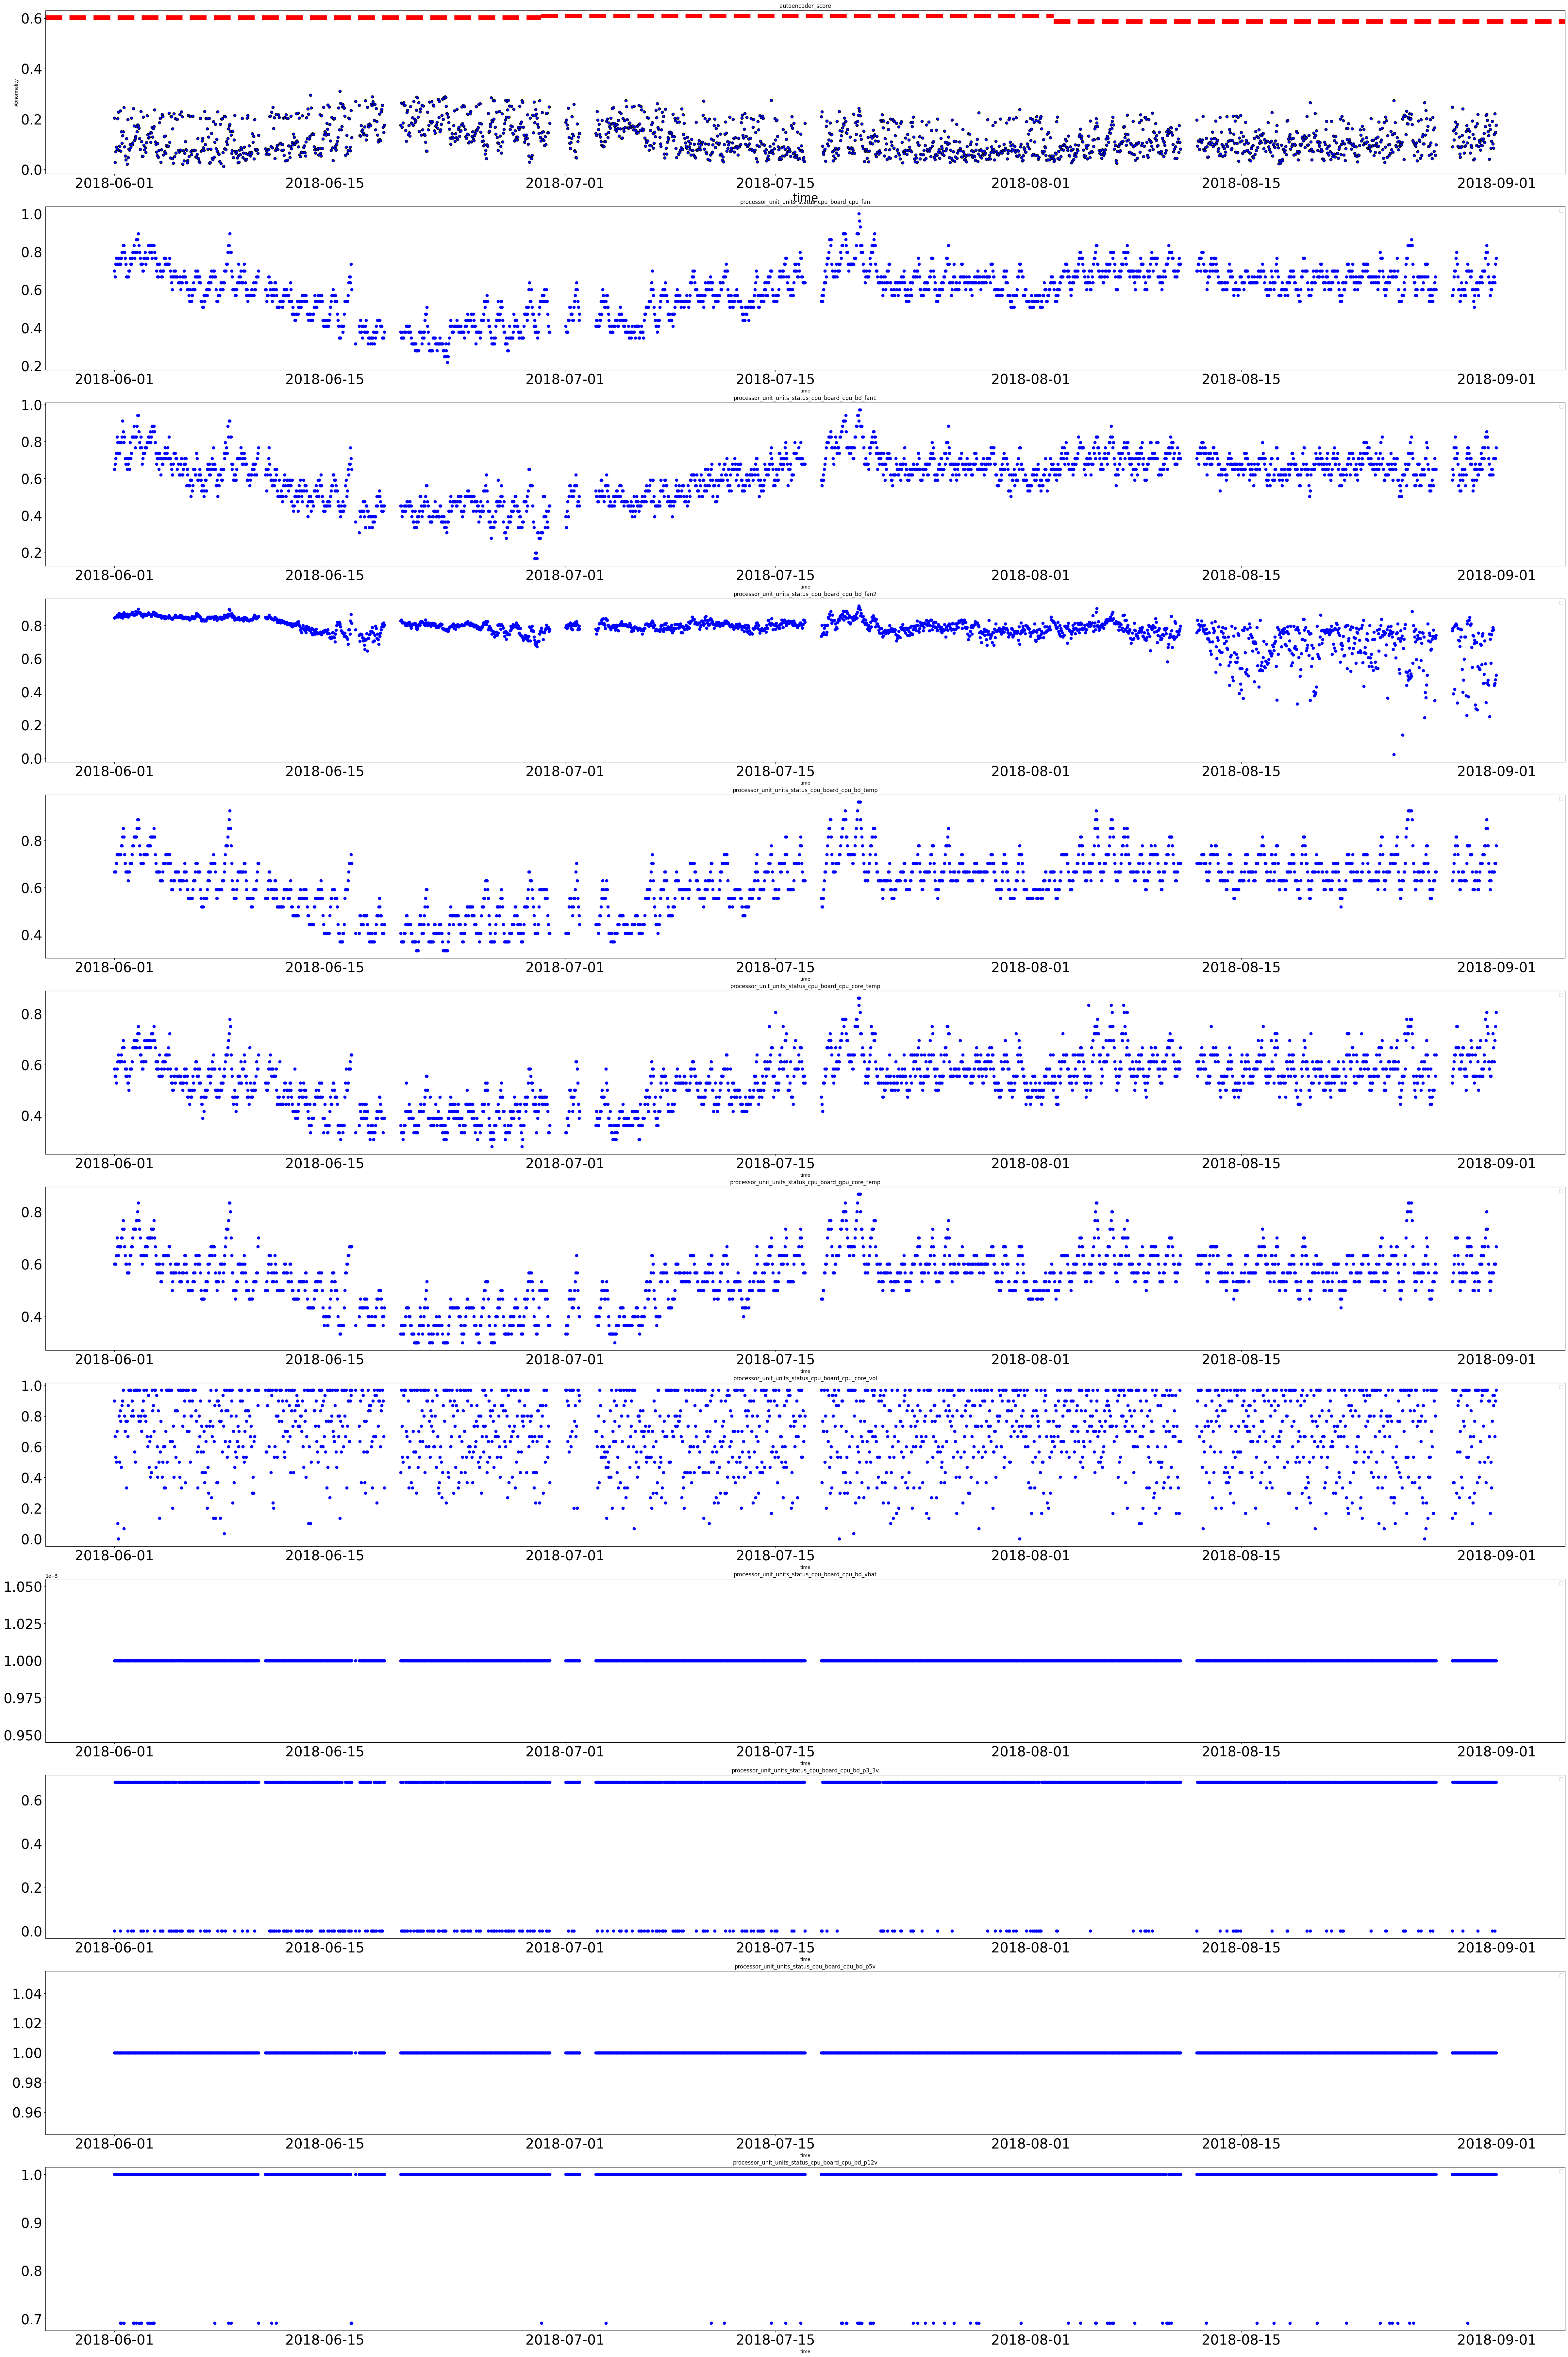

In [99]:
#結果のプロット
plot.plot_all(abnormal_scores,thresholds, config.columns_list, data_original)

(2037, 2)
(19198, 12)


c:\Users\小山佳祐\Desktop\研究元ファイル\abnormal\research_abnormal - コピー\src\plot.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


KeyError: 'processor_unit_units_status_cpu_board_cpu_fan'

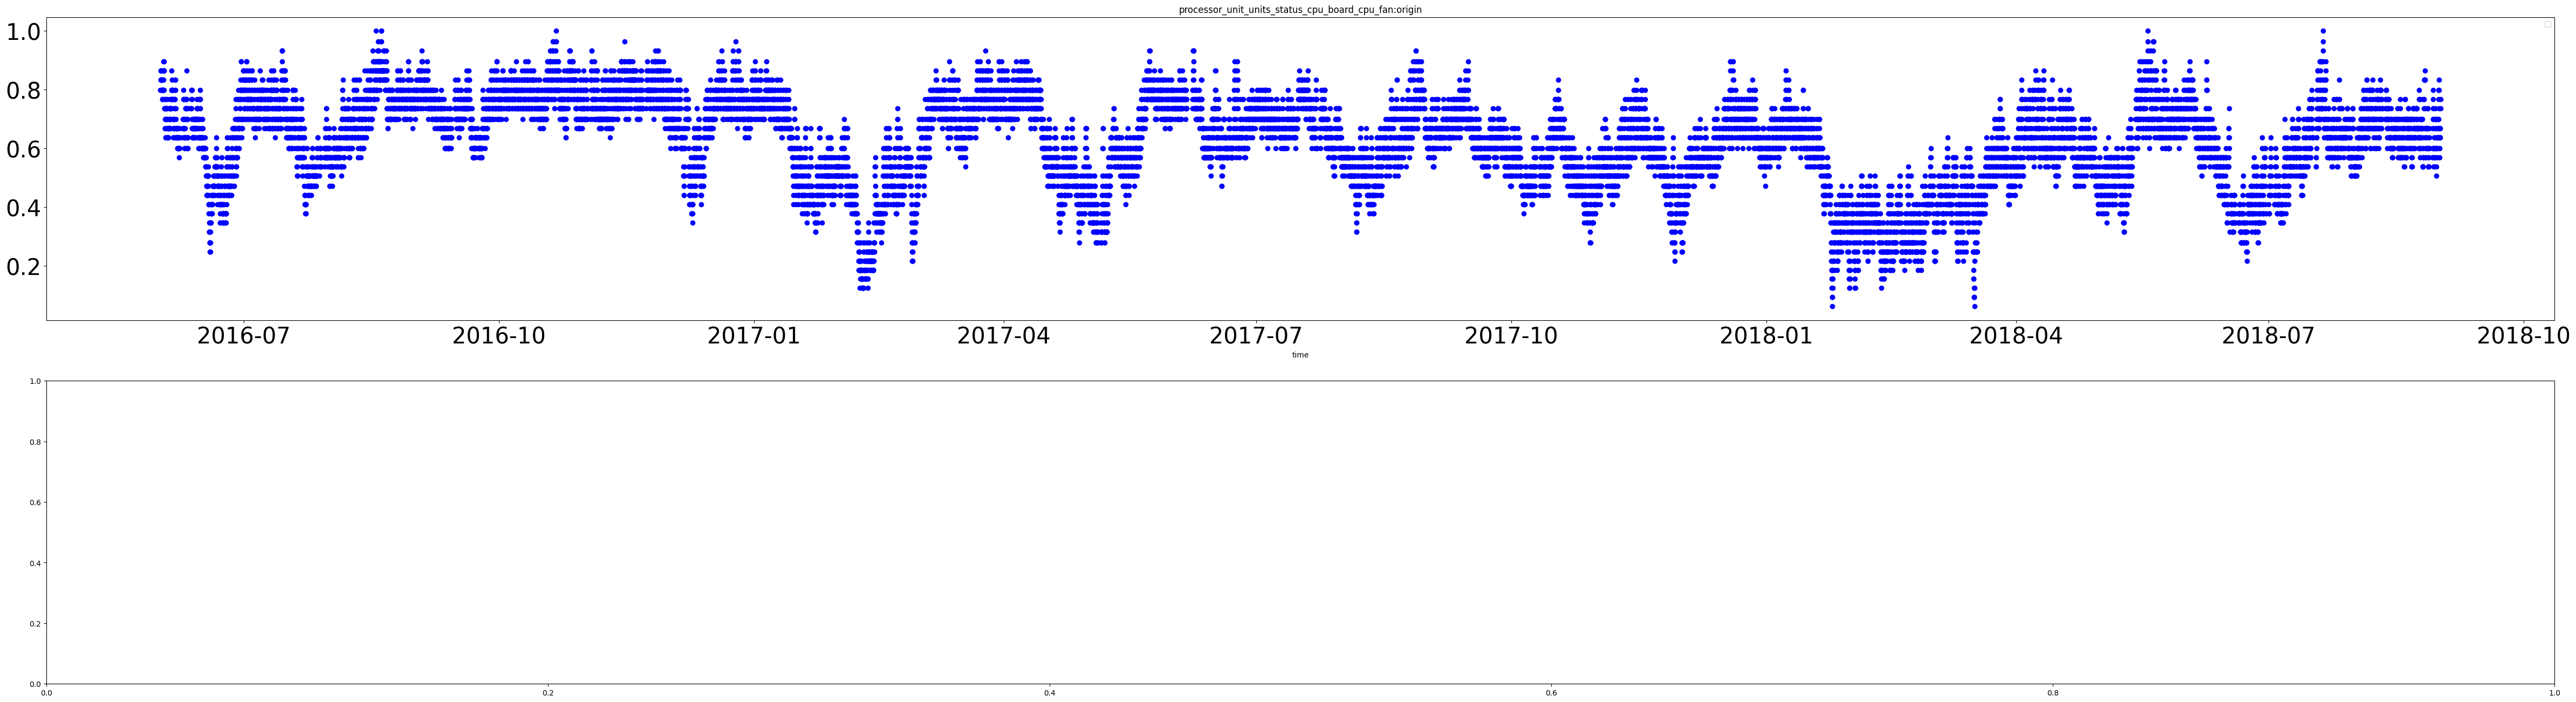

In [100]:
plot.plot_predict(abnormal_scores, config.columns_list, data_ex)

In [38]:
#収束の確認
plot.plot_final_loss_vs_unit_sum(loss_values)

NameError: name 'loss_values' is not defined

In [54]:
#モジュールの再リロード
import importlib
import src
import src.model
import src.model_basic

importlib.reload(src.model)
importlib.reload(src.data)
importlib.reload(src.model_basic)
importlib.reload(src.model.model_check_features)
importlib.reload(src.plot)
from src import data
from src import model_basic
from src import store
from src import plot
from src.model import model_check_features

#必要ライブラリのインストール
from src import *
